In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temporary-us-births/us_births_2016_2021.csv


In [2]:
df = pd.read_csv("/kaggle/input/temporary-us-births/us_births_2016_2021.csv")

df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [3]:
df.isna().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [4]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].factorize()[0]

In [5]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,0,0,2016,0,0,1,1052,27.8,3116.9
1,0,0,2016,0,1,2,3436,24.1,3040.0
2,0,0,2016,0,2,3,8777,25.4,3080.0
3,0,0,2016,0,3,4,6453,26.7,3121.9
4,0,0,2016,0,4,5,2227,28.9,3174.3


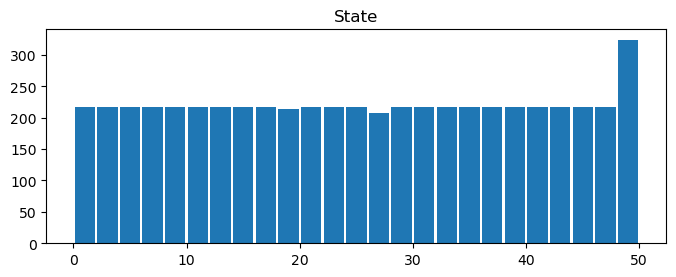

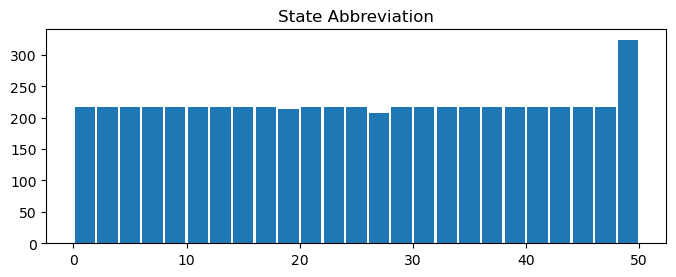

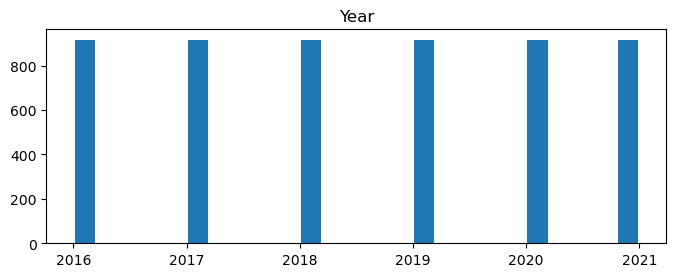

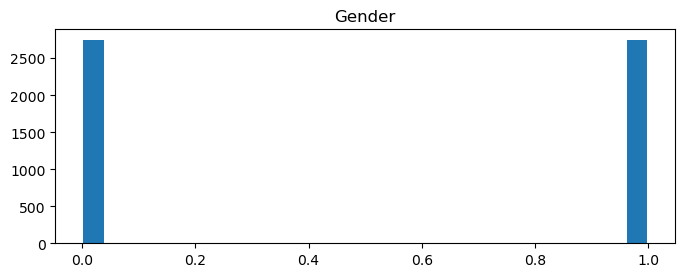

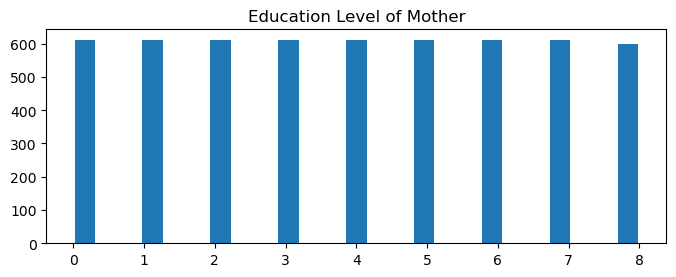

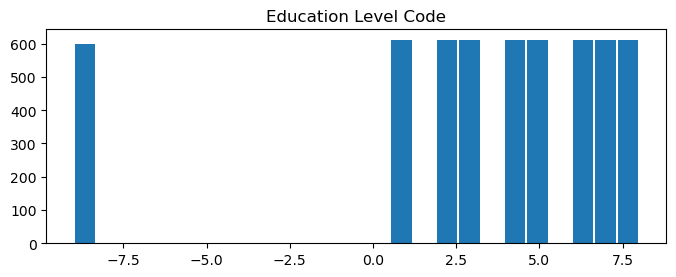

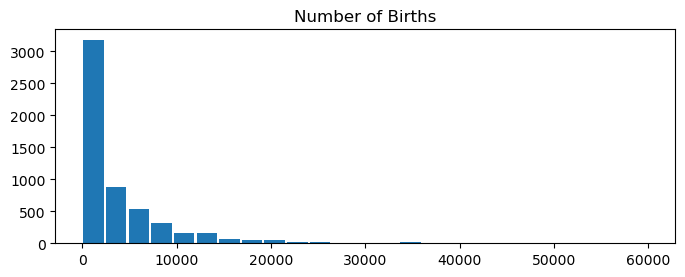

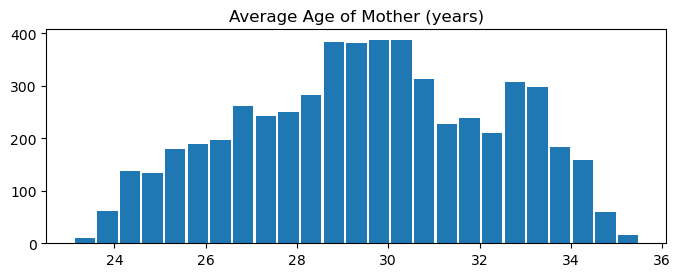

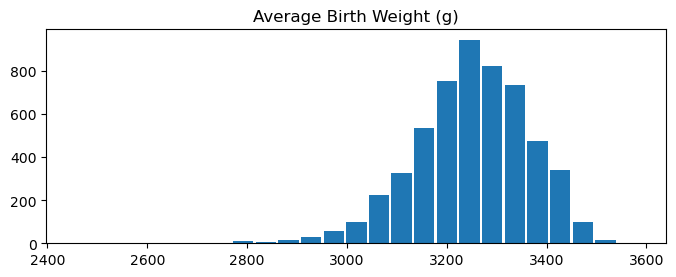

In [6]:
for col in df:
    ax = df.hist(column=col, bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, zorder=2, rwidth=0.9)    

In [7]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

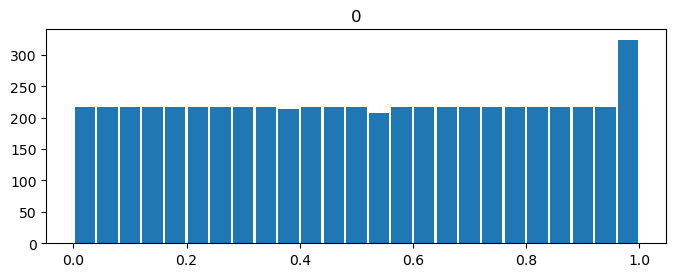

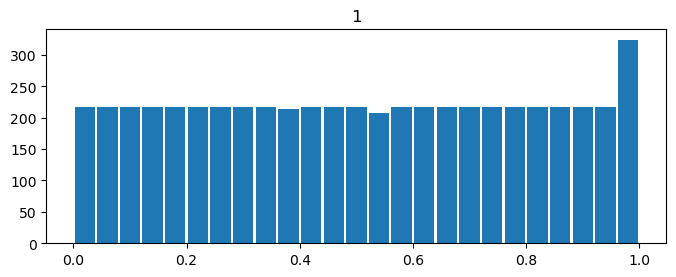

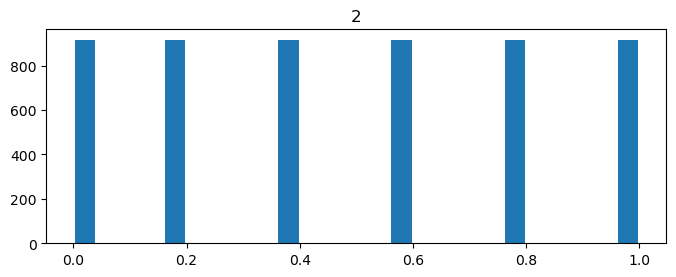

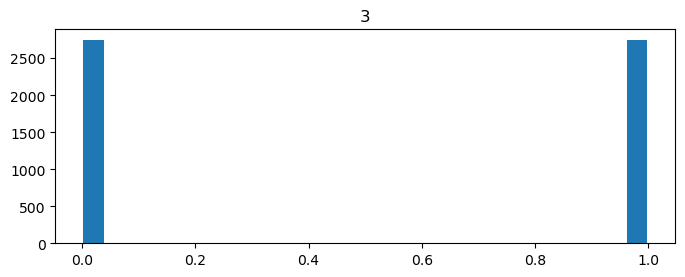

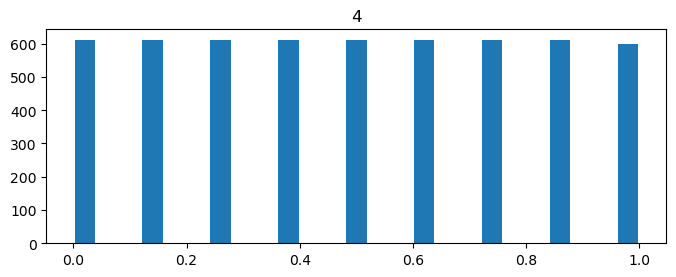

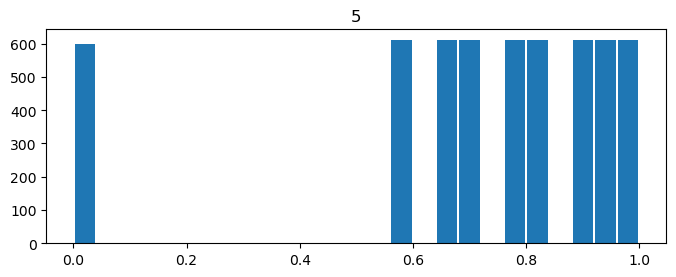

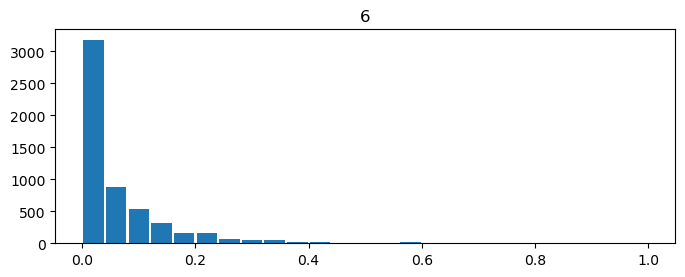

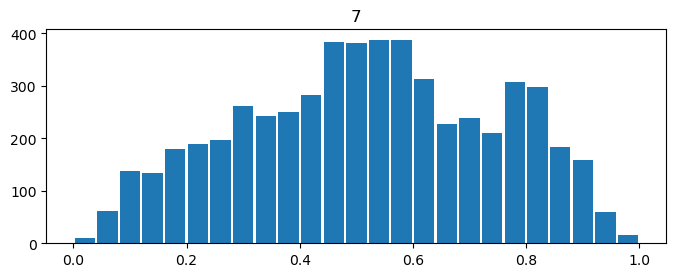

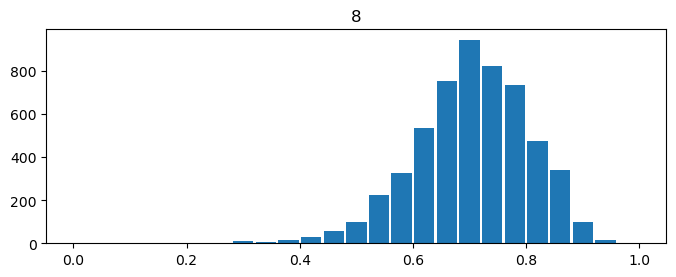

In [8]:
for col in df:
    ax = df.hist(column=col, bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, zorder=2, rwidth=0.9)    

Predict Number of Births

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:,df.columns != 6], df[6], test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.66)

This is a regression problem, so let's use linear regression to establish a baseline accuracy

In [10]:
def loss(model, data, labels):
    
    preds = model.predict(data)

    RMSE = 0

    for i, entry in enumerate(preds):
        RMSE += abs(entry - labels.iloc[i])**2

    RMSE = sqrt(RMSE / len(preds))

    return RMSE

In [11]:
from sklearn.linear_model import LinearRegression
from math import sqrt

reg = LinearRegression().fit(X_train, y_train)

print(loss(reg, X_train, y_train), loss(reg, X_valid, y_valid), loss(reg, X_test, y_test))

0.10710668027946392 0.11735709384070196 0.10724219683729912


In [12]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

print(loss(clf, X_train, y_train), loss(clf, X_valid, y_valid), loss(clf, X_test, y_test))

0.0 0.04622612478191022 0.0357128319840751
